# Les $\Lambda$


On dispose de 3 fonctions $\Lambda_{CI}(M,n,P)$, $\Lambda_{sCI}(M,n)$, $\Lambda_{WI}(M,n)$. La première est assez complexe, les suivantes sont plus simples, elles sont définies plus loin.  On va tracer ces fonctions et les comparer, notamment en traçant leur différence.

</p>

<font color='red'>ATTENTION: toujours exécuter l'étape 0, les autres étapes sont indépendantes.</font>

 0. [Fonctions et paramètres](#0)
 1. [Courbe $(M,n) \to \Lambda_{sCI}(M,n)-\Lambda_{WI}(M,n)$](#1)
 2. [Courbes $\Lambda_{sCI}$ et $\Lambda_{WI}$ (avec la même échelle)](#2)
 3. [Courbes $n\to \Lambda_{\mathrm{sCI}}(M,n)-\Lambda_{\mathrm{WI}}(M,n)$ pour $M=0.1,\,1,\,10$](#3)
 4. [Courbe  $n\to \Lambda_{\mathrm{sCI}}(M,n)-\Lambda_{\mathrm{WI}}(M,n)$ pour $M=0.1,\,1,\,10$](#4)
 5. [Courbe $\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ pour $n=2$ fixé](#5)
 6. [Courbe $\Lambda(M,n,P)$ pour $n=2$ fixé](#6)
 7. [Courbes $\Lambda(M,n,P)$ pour  $M$ fixé](#7)
 8. [Courbes $\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ pour 3 valeurs de  $M$ fixées ](#8)
 9. [Courbes $\Lambda(M,n,P)$ pour 3 valeurs de  $n$ fixées](#9)
 10. [Tracé de $\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ pour 3 valeurs de  $n$ fixées ](#10)
 11. [Courbe $P \to \Lambda(M,n,P)$ et   $\Lambda_{\mathrm{sCI}}(M,n)$ pour $M=1$ et pour 4 valeurs de  $n=2,3,4,5$ fixées](#11)
 12. [Tracés de $n\to \Lambda^*(M,n)$ et $n\to P^*(M,n)$  pour $M=0.1,1,10$](#12)

--------------------------
<a name="0"></a>
# 0. Fonctions et paramètres
### 0.1 Des fonctions techniques



In [1]:
import numpy as np
import matplotlib
#import matplotlib.cm as cm
#import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    shift_index = np.hstack([
        np.linspace(0.0, midpoint, num=128, endpoint=False), 
        np.linspace(midpoint, 1.0, num=129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

### 0.2 Les différences fonctions

On donne les définitions des fonctions précédentes, ainsi que l'expression de la différence:
$$
\Lambda_{sCI}(M,n)-\Lambda_{WI}(M,n)
  =
  \textstyle
  (n-1)\,(n-2)\,\big(n-\frac{1+\sqrt{1+4\,M^2}}{M^2}\big) \,\gamma(M,n)
$$
avec
\begin{align*}
\gamma(M,n)&= \textstyle{M^3\,(2\,M+2+M\,n)\,\big(n+\frac{\sqrt{1+4M^2}-1}{M^2}\big) }
               \big/ \big(    {6\,n^2\,(M+1)\,\psi(M,n)}\big)
\\
\psi(M,n)
& =
 2\,M^3\,n^3+M^4\,n^3+10\,M^3\,n^2+12\,M^2\,n^2+2\,M^4\,n^2+24\,M\,n+32\,M^2\,n+8\,M^3\,n+16+16\,M^2+32\,M+8\,M^3
\end{align*}


In [2]:
def diff_lambda(M, n):
    """ différence entre Lamnda CI et Lamnda WI """
    tpsi = 2*M*M*M*n*n*n+M*M*M*M*n*n*n+10*M*M*M*n*n+12*M*M*n*n+2*M*M*M*M*n*n
    tpsi = tpsi + 24*M*n+32*M*M*n+8*M*M*M*n+16+16*M*M+32*M+8*M*M*M
    t1 = np.sqrt(1+4*M*M)
    t2 = n+(t1-1)/(M*M)
    t3 = 6*n*n*(M+1)*tpsi
    tgamma = M*M*M*(2*M+2+M*n)*t2/t3
    t4 = (1+t1)/(M*M)
    dlambda = (n-1)*(n-2)*(n-t4)*tgamma
    return dlambda

def lambda_ci(M, n, P): 
    """ 
    Lamnda du modèle CI général 
    """
    numerateur = (1/3)*M**4*n**3 -(19/3)*M**2*n -4*M*P**2 -(16/3)*M*P**3 -4*M*P**4 +(8/3)*M*P**5 \
    +2*M*n +3*M**2*n**2 +M**4*n +(5/3)*M**3*n +(4/3)*n**2*P**5 -(8/3)*n*P**5 -(5/3)*M**3*P +4*n*P \
    -(52/3)*n*P**2 +(44/3)*n*P**3 +(4/3)*n*P**4 +4*n**2*P**2 -4*n**2*P**3 -(4/3)*n**2*P**4+M**3*n**3 \
    -(20/3)*M**2*P**2 -M**4*n**2 -(7/3)*M**3*n**2 +(4/3)*M**2*P**4 -(16/3)*M**2*P**3 -(2/3)*M**4*P \
    -(10/3)*M**3*P**3 +(10/3)*M**2*P +(5/3)*M**3*P**2 +12*M*P -(8/3)*M -(16/3)*P -(56/3)*P**3 +(16/3)*P**4 \
    -(1/3)*M**4 -(1/3)*M**3 +(56/3)*P**2+(10/3)*M**2 -(26/3)*M*n**2*P**3 -(2/3)*M*n**2*P**4 +(8/3)*M**3*n**3*P \
    +(62/3)*M*n*P**3 +(41/3)*M**2*n*P**3 -(10/3)*M**3*n*P**2+(2/3)*M**4*n**3*P+13*M**2*n*P**2 \
    -2*M**4*n**2*P +6*M**3*P*n +8*M*n**2*P -(14/3)*M*n**2*P**2 +(8/3)*M**2*n**2*P**4 +(4/3)*M*n*P**4 \
    -(23/3)*M**2*n**2*P**2 -(10/3)*M**3*n**2*P**3 -4*M*n*P**5 -7*M**3*n**2*P -(5/3)*M**2*n**2*P \
    +(8/3)*M**2*n**3*P -4*M**2*n*P**4 -(50/3)*M*n*P -(13/3)*M**2*n*P -(25/3)*M**2*n**2*P**3 \
    +(4/3)*M**2*n**3*P**2 +2*M**4*n*P +2*M*n**2*P**5 +(20/3)*M**3*n*P**3 +(4/3)*M*n**3*P**2 \
    +(2/3)*M*n*P**2+(5/3)*M**3*n**2*P**2
    denominateur = 6*M**2*n -20*M*P**2 +32*M*P**3 -2*M**4*n -M**3*n +4*M**3*P +8*n*P**2 \
    -8*n*P**3 +16*M**2*P**2 +M**4*n**2 +2*M**3*n**2 +16*M**2*P**3 +2*M**4*P+8*M**3*P**3 \
    -16*M**2*P -12*M*P +4*M +8*P +16*P**3 +M**4 -M**3-24*P**2 -4*M**2 -20*M*n*P**3 \
    -16*M**2*n*P**3 -2*M**3*n*P**2-20*M**2*n*P**2+2*M**4*n**2*P -11*M**3*P*n +4*M*n**2*P**2 +6*M**2*n**2*P**2 \
    +7*M**3*n**2*P +6*M**2*n**2*P +16*M*n*P +6*M**2*n*P- 4*M**4*n*P -8*M**3*n*P**3 -4*M*n*P**2+2*M**3*n**2*P**2
    denominateur = (n-1)*denominateur
    llambda_ci = numerateur / denominateur
    return llambda_ci

def lambda_ci2(M, n, P): # une version alternative de lambda_ci, donne la même chose
    """ 
    Lamnda du modèle CI général 
    """
    numerateur = -8*M +4*M*n**3*P**2 +41*M**2*n*P**3 -12*M*P**4 +8*M*P**5 +M**4*n**3 +12*n**2*P**2 \
    -50*M*n*P +39*M**2*n*P**2 -16*P +56*P**2 +12*n*P -52*n*P**2 +44*n*P**3 +4*n*P**4 +24*M*n**2*P +6*M*n \
    +5*M**3*P**2 +2*M*n*P**2 +6*M*n**2*P**5 +10*M**2 -21*M**3*n**2*P -56*P**3 -10*M**3*n**2*P**3\
    -23*M**2*n**2*P**2 -25*M**2*n**2*P**3 +8*M**2*n**2*P**4 -10*M**3*n*P**2 +20*M**3*n*P**3 \
    +8*M**2*n**3*P +4*M**2*n**3*P**2 -M**4 -5*M**3*P +3*M**4*n -10*M**3*P**3 -26*M*n**2*P**3\
    +2*M**4*n**3*P -14*M*n**2*P**2 -2*M*n**2*P**4 -5*M**2*n**2*P -12*M**2*n*P**4\
    -13*M**2*n*P -12*P**3*n**2 +8*M**3*n**3*P -16*M*P**3 -2*M**4*P +10*M**2*P -7*M**3*n**2\
    +62*M*P**3*n +4*M*P**4*n -12*M*P**5*n -6*M**4*P*n**2 +6*M**4*P*n +9*M**2*n**2 +5*M**3*n\
    -19*M**2*n +36*M*P -12*M*P**2 +5*M**3*n**2*P**2 -20*M**2*P**2 -16*M**2*P**3\
    -M**3 +16*P**4 +4*n**2*P**5 -8*n*P**5 +3*M**3*n**3 -3*M**4*n**2 +4*P**4*M**2 +18*M**3*n*P \
    -4*n**2*P**4
    denominateur = 4*M -16*M**2*n*P**3 +16*M*n*P -20*M**2*n*P**2 +8*P -24*P**2 +8*n*P**2 -8*n*P**3 \
    -4*M*n*P**2-4*M**2 +7*M**3*n**2*P +16*P**3 +6*M**2*n**2*P**2 -2*M**3*n*P**2\
    -8*M**3*n*P**3 +M**4 +4*M**3*P -2*M**4*n +8*M**3*P**3 +4*M*n**2*P**2 +6*M**2*n**2*P\
    +6*M**2*n*P +32*M*P**3 +2*M**4*P -16*M**2*P+2*M**3*n**2-20*M*P**3*n +2*M**4*P*n**2\
    -4*M**4*P*n -M**3*n +6*M**2*n -12*M*P -20*M*P**2 +2*M**3*n**2*P**2 +16*M**2*P**2 \
    +16*M**2*P**3 -M**3+M**4*n**2 -11*M**3*n*P
    denominateur = 3*(n-1)*denominateur
    lambda_ci2 = numerateur / denominateur
    return lambda_ci2

def lambda_sci(M, n): 
    """ 
    Lamnda du modèle CI symétrique 
    """
    terme_f = n*n*(n+2)*(n-1)*M**3 + n*(5*n*n+4*n+4)*M*M + (10*n*n+8*n+8)*M + 8*n
    terme_g = n*n*(n+2)*M**4 + 2*(n**3+5*n*n+4*n+4)*M**3 + 4*(n+2)*(3*n+2)*M*M + 8*(4+3*n)*M + 16
    lambda_sci = 1/3 + (n-1)*terme_f/(3*n*n*terme_g)
    return lambda_sci

def lambda_wi(M, n): 
    """ 
    Lamnda du modèle Wright’s island linear game model 
    """
    lambda_wi = 1/3+1/(6*(M+1))*(1-1/n)
    return lambda_wi

### 0.2 Fontes et latex

La question des fontes: on veut que la fonte du texte qui apparaisse dans les légendes soit la même que sous LaTeX, donc:

In [3]:
# toutes les fontes ressemlent à du latex
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Si on veut de <code>amstex</code>, on peut faire (ne marche pas car fait des fontes non-math trop grasses.
(mémo: RC vient d'Unix: from runcom files on the CTSS system 1962-63; run commands, commandes exécutées avant)

In [4]:
#matplotlib.rc('text', usetex = True)  # fait des fontes non-math un peu grasses
# and amstex
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

#### 0.3 Divers

In [5]:
color_du_0 = 'Teal'
color_du_max = 'w'

---------------------------------
<a name="1"></a>
# 1. Courbe $(M,n) \to \Lambda_{sCI}(M,n)-\Lambda_{WI}(M,n)$

On trace `diff_lambda`

On fait un log-log plot: au lieu de tracer $\Lambda_{sCI}(M,n)-\Lambda_{WI}(M,n)$ en fonction de $M$ et $n$ MAIS en échelles logarithmiques. 

<font color="red"> Comme c'est un log-log, on doit utiliser ENORMEMENT de points de discratisation en espace.</font>

### 1.1 Les paramètres

In [6]:
xMmin, xMmax = 0.05, 12            # min & max en M
xnmin, xnmax = 2, 200              # min & max en n
nd = 2000                          # nombre de points de discrétisation BEAUCOUP : car en log-log
rM, rn = xMmax-xMmin, xnmax-xnmin  # ranges
dM, dn = rM/nd, rn/nd              # pas de discrétisation
xM = np.arange(xMmin, xMmax, dM)   # points de discrétisation en M
xn = np.arange(xnmin, xnmax, dn)   # points de discrétisation en n
XM, Xn  = np.meshgrid(xM, xn)      # grille de discrétisation en M x n

### 1.2 Calcul de la différence

In [7]:
difference = diff_lambda(XM,Xn)

#  lambda_ci2(XM,Xn,1/Xn)-lambda_ci(XM,Xn,1/Xn) vaut e-16
#  llambda_ci(XM,Xn,1/Xn)-lambda_sci(XM,Xn) vaut e-16

### 1.3 Tracé de la courbe

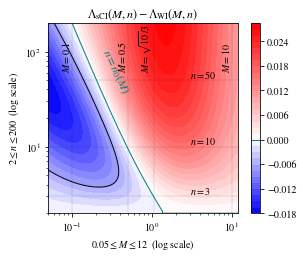

In [8]:
%matplotlib inline  

orig_cmap = matplotlib.cm.bwr
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=-difference.min()/(difference.max()-difference.min()), \
                               name='shifted')

figure1 = plt.figure(figsize=[4.5,3.5])
    
plt.rcParams['contour.negative_linestyle'] = 'solid'
CS = plt.contour(XM, Xn, difference, colors='black', linewidths=0)

CS.collections[2].set_linewidth(1)           # the cyan line, zero level
#CS.collections[2].set_color('c')

surfplot = plt.contourf(XM, Xn, difference, 37, cmap=shifted_cmap)

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.axis([XM.min(), XM.max(), Xn.min(), Xn.max()])
plt.gca().set_aspect(np.log10(XM.max()/XM.min())/np.log10(Xn.max()/Xn.min())) # squared axis in log-log plot

# --- colorbar
plt.title(r'$\Lambda_{\mathrm{sCI}}(M,n)-\Lambda_{\mathrm{WI}}(M,n)$')
cbar = plt.colorbar(surfplot)
# rajout d'un trait pour le niveau 0 dans la colorbar
cont = plt.contour(surfplot, levels=[0], colors=color_du_0, linewidths=1)
cbar.add_lines(cont)

# --- les coupes en M
M_coupes = [(0.1,           'k', '$M=0.1$'), \
            (0.5,           'k', '$M=0.5$'), \
            (np.sqrt(10)/3, 'k', '$M=\sqrt{10}/3$'), \
            (10,            'k', '$M=10$')]

for coupe in M_coupes:
    plt.axvline(coupe[0], color= coupe[1], linewidth=.1)
    plt.text   (coupe[0], 60, coupe[2], fontsize=10, rotation=90,\
                horizontalalignment='right',verticalalignment='bottom',color= coupe[1])

# --- les coupes en n
n_coupes = [(3,  'k', '$n=3$'), \
            (10, 'k', '$n=10$'), \
            (50, 'k', '$n=50$')]

for coupe in n_coupes:
    plt.axhline(coupe[0], color= coupe[1], linewidth=.1)
    plt.text   (3, coupe[0], coupe[2], fontsize=10, \
                horizontalalignment='left',verticalalignment='bottom',color= coupe[1])

formula = r"$n=n_0(M)$"
plt.text(0.22, 37.8, formula, color=color_du_0, fontsize=12, rotation=-65)

# --- log–log graph
plt.xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax)+'  (log scale)')
plt.ylabel(str(xnmin)+'$\leq n\leq$'+str(xnmax)+'  (log scale)')
plt.xscale('log')
plt.yscale('log')

pdf = PdfPages('diff_lambda.pdf')
pdf.savefig(figure1) #,bbox_inches='tight')
pdf.close()

----------------------
<a name="2"></a>
# 2.  Courbes $\Lambda_{sCI}$ et $\Lambda_{WI}$ (avec la même échelle)

### 2.1 Paramètres

On n'est plus en log-log: on prend donc beaucoup moins de points de discrétisation.

In [9]:
xMmin, xMmax = 0.05, 10                # min & max en M
xnmin, xnmax = 2, 200                  # min & max en n
nd = 200                               # nombre de points de discrétisation 
rM, rn = xMmax-xMmin, xnmax-xnmin      # ranges
dM, dn = rM/nd, rn/nd                  # pas de discrétisation
xM, xn = np.arange(xMmin, xMmax, dM), np.arange(xnmin, xnmax, dn)   # points de discrétisation
XM, Xn = np.meshgrid(xM, xn)           # grille de discrétisation en M x n

### 2.2 Tracés

In [10]:
%matplotlib inline  

le_lambda_sci = lambda_sci(XM,Xn)
le_lambda_wi = lambda_wi(XM,Xn)

np.amin([le_lambda_sci.min(), le_lambda_wi.min()])



0.3409435096611188

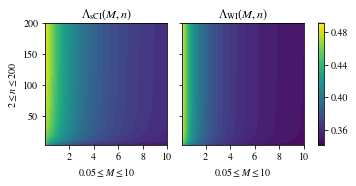

In [11]:
%matplotlib inline  

le_lambda_sci = lambda_sci(XM,Xn)
le_lambda_wi = lambda_wi(XM,Xn)

min_min = np.min([le_lambda_sci.min(), le_lambda_wi.min()])
max_max = np.max([le_lambda_sci.max(), le_lambda_wi.max()])
f_levels = np.linspace(min_min, max_max, 41)

figure2 = plt.figure(figsize=(5,2.5))
figure2.subplots_adjust(bottom=0.2)

grid = AxesGrid(figure2, 111,
                nrows_ncols = (1, 2),
                axes_pad = 0.2,
                share_all = True,
                label_mode = "L",
                cbar_location = "right",
                cbar_mode = "single")

for ax,data,ttl in zip(grid, \
                   [le_lambda_sci,le_lambda_wi], \
                   [r'$\Lambda_{\mathrm{sCI}}(M,n)$', r'$\Lambda_{\mathrm{WI}}(M,n)$']):
    p=ax.contourf(XM, Xn, data, levels=f_levels,vmin=min_min, vmax=max_max)
    ax.set_xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax))
    ax.set_xticks([2,4,6,8,10])
    ax.set_yticks([50,100,150,200])
    ax.set_title(ttl)
    ax.set_xlim(0.05,10)
    ax.set_ylim(2,200)
    ax.set_aspect((XM.max()-XM.min())/(Xn.max()-Xn.min()))

grid[0].set_ylabel(str(xnmin)+'$\leq n\leq$'+str(xnmax))
grid.cbar_axes[0].colorbar(p, format='%.2f')

pdf = PdfPages('lambda_sci_and_wi.pdf')
pdf.savefig(figure2,bbox_inches='tight')
pdf.close()

----------------------
<a name="3"></a>
# 3. Courbes $n\to \Lambda_{\mathrm{sCI}}(M,n)-\Lambda_{\mathrm{WI}}(M,n)$ pour $M=0.1,\,1,\,10$

### 3.1 Paramètres

In [12]:
xMmin, xMmax = 0.05, 12
xnmin, xnmax = 2, 250
nd = 2000  # attention on est en log, donc plus de points !
dM, dn = (xMmax-xMmin)/nd, (xnmax-xnmin)/nd
xM, xn = np.arange(xMmin, xMmax, dM), np.arange(xnmin, xnmax, dn)
M = [0.1, 0.5, np.sqrt(10)/3, 10]

### 3.2 Tracé

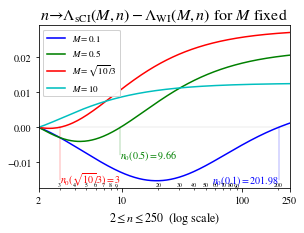

In [13]:
%matplotlib inline  
from matplotlib.ticker import FixedLocator, FormatStrFormatter

figure3 = plt.figure(figsize=[4.5,3])

plt.axhline(0, color= '0.75', linewidth=.3) # une ligne horizontale

ddy = 0.002
n01 = 201.98
plt.plot([n01, n01], [-0.015, 0], 'b', linewidth=.3)
plt.text(n01, -0.015-ddy, '$n_0($'+str(M[0])+'$)=$'+str(n01), color='b', fontsize=10, \
         horizontalalignment='right',verticalalignment='bottom')
n02 = 9.66
plt.plot([n02, n02], [-0.008, 0], 'g', linewidth=.3)
plt.text(n02, -0.008-ddy, '$n_0($'+str(M[1])+'$)=$'+str(n02), color='g', fontsize=10, \
         horizontalalignment='left',verticalalignment='bottom')
n03 = 3
plt.plot([n03, n03], [-0.015, 0], 'r', linewidth=.3)
plt.text(n03, -0.015-ddy, r'$n_0(\sqrt{10}/3)=$'+str(n03), color='r', fontsize=10, \
         horizontalalignment='left',verticalalignment='bottom')

p1, = plt.plot(xn,diff_lambda(M[0],xn),'b')
p2, = plt.plot(xn,diff_lambda(M[1],xn),'g')
p3, = plt.plot(xn,diff_lambda(M[2],xn),'r')
p4, = plt.plot(xn,diff_lambda(M[3],xn),'c')

plt.title(r'$n \to \Lambda_{\mathrm{sCI}}(M,n) - \Lambda_{\mathrm{WI}}(M,n)$ for $M$ fixed', fontsize=16)
plt.xlabel(str(xnmin)+'$\leq n\leq$'+str(xnmax)+'  (log scale)', fontsize=12)

# --- légende
legend3 = plt.legend( [p1, p2, p3, p4], \
                     ['$M=$'+str(M[0]), '$M=$'+str(M[1]), '$M=\sqrt{10}/3$', '$M=$'+str(M[3])], \
                     loc=2, fontsize=9)
plt.gca().add_artist(legend3)
plt.xscale('log')

# --- les ticks
ax = plt.gca()
ax.set_xticks([2,10,100,250])
#ax.xaxis.set_minor_locator([3,4,5])
plt.tick_params(axis='x', pad=-8, which='minor', labelsize=6)
#ax.xaxis.set_minor_locator([3,4,5])
ax.xaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
ax.tick_params(which='major', axis='x')

plt.xlim(xnmin, xnmax) 

pdf = PdfPages('diff_lambda_M_fixed.pdf')
pdf.savefig(figure3,bbox_inches='tight')
pdf.close()

------------------------
<a name="4"></a>
# 4. Courbe  $n\to \Lambda_{\mathrm{sCI}}(M,n)-\Lambda_{\mathrm{WI}}(M,n)$ pour $M=0.1,\,1,\,10$

### 4.1 Paramètres

In [14]:
xMmin, xMmax = 0.05, 10
xnmin, xnmax = 2, 250
nd = 2000                                   # attention on est en log, donc plus de points !
dM, dn = (xMmax-xMmin)/nd, (xnmax-xnmin)/nd
xM, xn = np.arange(xMmin, xMmax, dM), np.arange(xnmin, xnmax, dn)
n = [3, 10, 50]

### Tracés

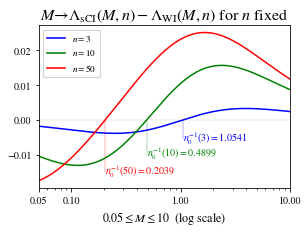

In [15]:
%matplotlib inline  
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag
        
figure4 = plt.figure(figsize=[4.5,3])

plt.axhline(0, color= '0.75', linewidth=.3) # une ligne horizontale

ddy = 0.002
M01 = 1.0541
plt.plot([M01, M01], [-0.0055, 0], 'b', linewidth=.3)
plt.text(M01, -0.0055-ddy, '$n_0^{-1}($'+str(n[0])+'$)=$'+str(M01), color='b', fontsize=10, \
         horizontalalignment='left',verticalalignment='bottom')
M02 = 0.4899
plt.plot([M02, M02], [-0.01, 0], 'g', linewidth=.3)
plt.text(M02, -0.01-ddy, '$n_0^{-1}($'+str(n[1])+'$)=}$'+str(M02), color='g', fontsize=10, \
         horizontalalignment='left',verticalalignment='bottom')
M03 = 0.2039
plt.plot([M03, M03], [-0.015, 0], 'r', linewidth=.3)
plt.text(M03, -0.015-ddy, r'$n_0^{-1}($'+str(n[2])+'$)=}$'+str(M03), color='r', fontsize=10, \
         horizontalalignment='left',verticalalignment='bottom')

p1, = plt.plot(xM,diff_lambda(xM,n[0]),'b')
p2, = plt.plot(xM,diff_lambda(xM,n[1]),'g')
p3, = plt.plot(xM,diff_lambda(xM,n[2]),'r')

plt.title(r'$M \to \Lambda_{\mathrm{sCI}}(M,n) - \Lambda_{\mathrm{WI}}(M,n)$ for $n$ fixed', fontsize=16)
plt.xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax)+'  (log scale)', fontsize=12)
legend4 = plt.legend( [p1, p2, p3], \
                     ['$n=$'+str(n[0]), '$n=$'+str(n[1]), '$n=$'+str(n[2])], \
                     loc=2, fontsize=9)
plt.gca().add_artist(legend4)
plt.xscale('log')

# --- x axis ticks
# jouer avec les minor/major ticks
ax = plt.gca()
ax.set_xticks([0.05,0.1,1,10])
#plt.tick_params(axis='x', pad=-8, which='minor', labelsize=6)
#ax.xaxis.set_minor_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FixedOrderFormatter(-2))
#ax.xaxis.set_minor_formatter(FixedOrderFormatter(-2))
ax.tick_params(which='major', axis='x')

plt.xlim(xMmin, xMmax) 
plt.show()

pdf = PdfPages('diff_lambda_n_fixed.pdf')
pdf.savefig(figure4,bbox_inches='tight')
pdf.close()

--------------------
<a name="5"></a>
# 5. Courbe $\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ for $n=2$ fixed

### 5.1 Paramètres 

In [16]:
xMmin, xMmax = 0.05, 10            # min & max en M
xPmin, xPmax = 0, 1                # min & max en P
nd = 1000                          # nombre de points de discrétisation 
                                   # assez grand à cause du tracé du argmax
rM, rP = xMmax-xMmin, xPmax-xPmin  # ranges
dM, dP = rM/nd, rP/nd              # pas de discrétisation
xM, xP = np.arange(xMmin, xMmax, dM), np.arange(xPmin, xPmax, dP)   # points de discrétisation
X2M, X2P = np.meshgrid(xM, xP)     # grille de discrétisation en M x P

### 5.2 Calculs

In [17]:
difference_2 = lambda_ci(X2M,2,X2P) - lambda_sci(X2M,2)
min2, max2 = np.min(difference_2), np.max(difference_2)

### 5.3 Tracé

/Users/campillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


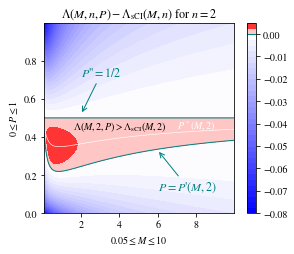

In [18]:
%matplotlib inline  

orig_cmap = matplotlib.cm.bwr #bwr ou seismic pour plus de contrastes
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=-min2/(max2-min2), name='shifted')

figure5 = plt.figure(figsize=[4.5,3.5])

surfplot = plt.contourf(X2M, X2P, difference_2, 37, cmap=shifted_cmap)

plt.rcParams['contour.negative_linestyle'] = 'solid'
surfplot.collections[2].set_linewidth(1)           # the cyan line, zero level

# tracé de l'argmax de la différence
plt.plot(xM, xP[np.argmax(difference_2,axis=0)], color_du_max, linewidth=.6)

#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
ax1 = plt.axis([X2M.min(), X2M.max(), X2P.min(), X2P.max()])
plt.axes().set_aspect((X2M.max()-X2M.min())/(X2P.max()-X2P.min())) # squared axes

plt.xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax))
plt.ylabel(str(xPmin)+'$\leq P\leq$'+str(xPmax))
#plt.xscale('log')
#plt.yscale('log')

# --- colorbar
# plt.clabel(CS, inline=1, fontsize=8, colors='black') # on ne met pas les valeurs des niveaux sur les courbes
plt.title(r'$\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ for $n=2$')
cbar = plt.colorbar(surfplot)
# --- rajout d'un trait pour le niveau 0 dans la colorbar
cont = plt.contour(surfplot, levels=[0], colors=color_du_0, linewidths=1)
cbar.add_lines(cont)

plt.text(4, 0.44, r"$\Lambda(M,2,P) > \Lambda_{\mathrm{sCI}}(M,2)$", color="k", \
         fontsize=10, horizontalalignment='center')
plt.annotate(r"$P$''$=1/2$", xy=(2, 0.52), xytext=(2, 0.7), color=color_du_0, fontsize=12, \
             arrowprops=dict(arrowstyle="->", color=color_du_0) ,\
             horizontalalignment='left',
             verticalalignment='bottom')

# problème avec le ' en mode math : donc mode texte
plt.annotate(r"$P=P$'$(M,2)$", xy=(6, 0.33), xytext=(6, 0.1), color=color_du_0, fontsize=12, \
             arrowprops=dict(arrowstyle="->", color=color_du_0) ,\
             horizontalalignment='left',
             verticalalignment='bottom')

#plt.annotate(r"$P^*(M,2)$", \
#             xy=(9, 0.43), xytext=(6, 0.6), color='k', fontsize=9, \
#             arrowprops=dict(arrowstyle="->", color='k', linewidth=.3) ,\
#             horizontalalignment='left',
#             verticalalignment='bottom')
plt.text(8, 0.44, r"$P^*(M,2)$", color=color_du_max, fontsize=10, horizontalalignment='center')

pdf = PdfPages('diff_lambda_M2NvsM2.pdf')
pdf.savefig(figure5)
pdf.close()

---------------------------------
<a name="6"></a>
# 6. Courbe $\Lambda(M,n,P)$ for $n=2$ fixed

### Paramètres

In [19]:
xMmin, xMmax = 0.05, 10            # min & max en M
xPmin, xPmax = 0, 1                # min & max en P
nd = 1000                          # nombre de points de discrétisation 
rM, rP = xMmax-xMmin, xPmax-xPmin  # ranges
dM, dP = rM/nd, rP/nd              # pas de discrétisation
xM, xP = np.arange(xMmin, xMmax, dM), np.arange(xPmin, xPmax, dP)   # points de discrétisation
X2M, X2P = np.meshgrid(xM, xP)     # grille de discrétisation en M x P

### 6.2 Calculs

In [20]:
nn = 2
le_lambda_2 = lambda_ci(X2M,nn,X2P) 
min_min, max_max = np.min(le_lambda_2), np.max(le_lambda_2)

### 6.3 Tracé

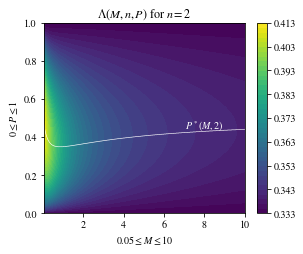

In [21]:
%matplotlib inline  

f_levels = np.linspace(min_min, max_max, 41, endpoint=True)

figure6 = plt.figure(figsize=[4.5,3.5])

surfplot = plt.contourf(X2M, X2P, le_lambda_2, levels=f_levels, vmin=min_min, vmax=max_max)
plt.title(r'$\Lambda(M,n,P)$ for $n=$'+str(nn))
plt.xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax))    
plt.ylabel(str(xPmin)+'$\leq P\leq$'+str(xPmax))    
plt.xlim(xMmin,xMmax)
plt.ylim(xPmin,xPmax)
#ax1 = plt.axis([X2M.min(), X2M.max(), X2P.min(), X2P.max()])
#plt.axes().set_aspect((X2M.max()-X2M.min())/(X2P.max()-X2P.min())) # squared axes
plt.plot(xM, xP[np.argmax(le_lambda_2,axis=0)], color_du_max, linewidth=.6)

plt.text(8, 0.44, r"$P^*(M,2)$", color=color_du_max, fontsize=10, horizontalalignment='center')

cbar = plt.colorbar(surfplot,format='%.3f')

pdf = PdfPages('lambda_M2N.pdf')
pdf.savefig(figure6,bbox_inches='tight')
pdf.close()

-------------------------------
<a name="7"></a>
# 7. Courbes $\Lambda(M,n,P)$ à  $M$ fixé

### 7.1 Paramètres

In [22]:
xnmin, xnmax = 2, 200                    # min & max en n
xPmin, xPmax = 0, 1                      # min & max en P
nd = 200                                 # nombre de points de discrétisation 
rn, rP = xnmax-xnmin, xPmax-xPmin        # ranges
dn, dP = rn/nd, rP/nd                    # pas de discrétisation
xn, xP = np.arange(xnmin, xnmax, dn), np.arange(xPmin, xPmax, dP) # points de discrétisation
X3n, X3P = np.meshgrid(xn, xP)           # grille de discrétisation en n x P

### 7.2 Calculs

In [23]:
M = [0.1, 1, 10]
le_lambda_3 = [lambda_ci(M[0],X3n,X3P), \
               lambda_ci(M[1],X3n,X3P), \
               lambda_ci(M[2],X3n,X3P)]

### 7.3 Tracés

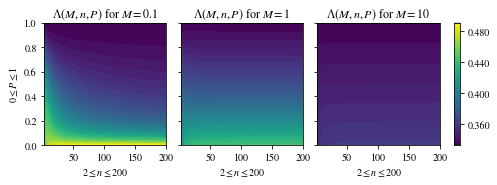

In [24]:
%matplotlib inline  

min_min, max_max = np.min(le_lambda_3), np.max(le_lambda_3)
f_levels = np.linspace(min_min, max_max, 37, endpoint=True)

figure7 = plt.figure(figsize=(7.5,2.5))
figure7.subplots_adjust(bottom=0.2)

grid = AxesGrid(figure7, 111,
                nrows_ncols=(1, 3),
                axes_pad=0.2,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for ax,data,Mi in zip(grid, le_lambda_3, M):
    p=ax.contourf(X3n, X3P, data, f_levels, vmin=min_min, vmax=max_max)
    ax.set_title(r'$\Lambda(M,n,P)$ for $M=$'+str(Mi))
    ax.set_xlabel(str(xnmin)+'$\leq n\leq$'+str(xnmax))    
    ax.set_xlim(2,200)
    ax.set_ylim(0,1)
    ax.set_aspect((X3n.max()-X3n.min())/(X3P.max()-X3P.min()))

grid[0].set_ylabel(str(xPmin)+'$\leq P\leq$'+str(xPmax))
grid.cbar_axes[0].colorbar(p,format='%.3f')

pdf = PdfPages('lambda_MnP_Mi.pdf')
pdf.savefig(figure7,bbox_inches='tight')
pdf.close()

----------------------------------
<a name="8"></a>
# 8. Courbes $\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ pour 3 valeurs de  $M$ fixées 

### 8.1 Paramètres

In [25]:
xnmin, xnmax = 2, 100                    # min & max en n
xPmin, xPmax = 0, 1                      # min & max en P
nd = 1000                                # nombre de points de discrétisation 
rn, rP = xnmax-xnmin, xPmax-xPmin        # ranges
dn, dP = rn/nd, rP/nd                    # pas de discrétisation
xn, xP = np.arange(xnmin, xnmax, dn), np.arange(xPmin, xPmax, dP) # points de discrétisation
X3n, X3P = np.meshgrid(xn, xP)           # grille de discrétisation en n x P

### 8.2 Calculs

In [26]:
M = [0.1, 1, 10]
differences = [lambda_ci(M[0],X3n,X3P) - lambda_sci(M[0],X3n),\
               lambda_ci(M[1],X3n,X3P) - lambda_sci(M[1],X3n),\
               lambda_ci(M[2],X3n,X3P) - lambda_sci(M[2],X3n)]

### 8.3 Tracés

/Users/campillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/Users/campillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/Users/campillo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  func(*args, **kwargs)
/Users/campillo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


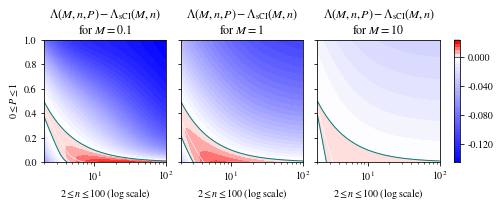

In [27]:
%matplotlib inline  

min_min, max_max = np.min(differences), np.max(differences)
f_levels = np.linspace(min_min, max_max+0.00165, 37, endpoint=True)
                        # PATCH : ici le +0.00165 sert à caller le 0 !

orig_cmap = matplotlib.cm.bwr #seismic #bwr
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=-min_min/(max_max-min_min), name='shifted')

figure8 = plt.figure(figsize=(7.5,2.5))
figure8.subplots_adjust(bottom=0.2)

grid = AxesGrid(figure8, 111,
                nrows_ncols=(1, 3),
                axes_pad=0.2,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for ax,data,Mi in zip(grid, differences, M):
    p=ax.contourf(X3n, X3P, data, levels=f_levels, cmap=shifted_cmap, vmin=min_min, vmax=max_max)
    #p=ax.contourf(X3n, X3P, data, levels=f_levels, cmap=custom_div_cmap(37), vmin=min_min, vmax=max_max)
    ax.set_title(r'$\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$' + '\n' + r'for $M=$'+str(Mi))
    ax.set_xlabel(str(xnmin)+'$\leq n\leq$'+str(xnmax)+' (log scale)')    
    ax.set_xscale('log')
    ax.set_xlim(xnmin, xnmax)
    ax.set_ylim(xPmin, xPmax)
    ax.set_aspect((X3n.max()-X3n.min())/(X3P.max()-X3P.min()))
    # --- tracé de l'argmax de la différence
    ax.plot(xn, xP[np.argmax(data,axis=0)], color_du_max, linewidth=.6)
    # --- rajout d'un trait pour le niveau 0 dans la colorbar
    cont = ax.contour(X3n, X3P, data, levels=[0], colors=color_du_0, linewidths=1)

grid[0].set_ylabel(str(xPmin)+'$\leq P\leq$'+str(xPmax))

# --- cbar et rajout d'un trait pour le niveau 0 dans la colorbar
cbar = grid.cbar_axes[0].colorbar(p, format='%.3f')
cbar.add_lines(cont)

pdf = PdfPages('lambda_MnP_diff_Mi.pdf')
pdf.savefig(figure8,bbox_inches='tight')
pdf.close()

--------------------------------------------------
<a name="9"></a>
# 9. Courbes $\Lambda(M,n,P)$ pour 3 valeurs de  $n$ fixées

### 9.1 Paramètres

In [28]:
n = [3, 4, 10]
xMmin, xMmax = 0.05, 10               # min & max en M
xPmin, xPmax = 0, 1                   # min & max en P
nd = 200                              # nombre de points de discrétisation 
rM, rP = xMmax-xMmin, xPmax-xPmin     # ranges
dM, dP = rM/nd, rP/nd                 # pas de discrétisation
xM, xP = np.arange(xMmin, xMmax, dM), np.arange(xPmin, xPmax, dP) # points de discrétisation
X2M, X2P = np.meshgrid(xM, xP)        # grille de discrétisation en M x P

### 9.2 Calculs

In [29]:
le_lambda = [lambda_ci(X2M, n[0], X2P), \
             lambda_ci(X2M, n[1], X2P), \
             lambda_ci(X2M, n[2], X2P)]

### 9.3 Tracé

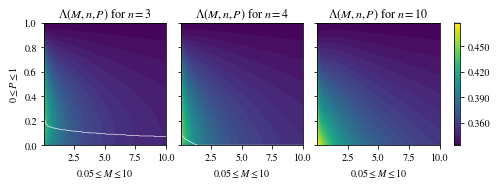

In [30]:
%matplotlib inline  

min_min, max_max = np.min(le_lambda), np.max(le_lambda)
f_levels = np.linspace(min_min, max_max, 41, endpoint=True)

figure9 = plt.figure(figsize=(7.5,2.5))
figure9.subplots_adjust(bottom=0.2)
grid = AxesGrid(figure9, 111,
                nrows_ncols=(1, 3),
                axes_pad=0.2,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for ax,data,ni in zip(grid, le_lambda, n):
    p=ax.contourf(X2M, X2P, data, levels=f_levels, vmin=min_min, vmax=max_max)
    ax.set_title(r'$\Lambda(M,n,P)$ for $n=$'+str(ni))
    ax.set_xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax))    
    ax.set_xlim(xMmin,xMmax)
    ax.set_ylim(xPmin,xPmax)
    ax.set_aspect((X2M.max()-X2M.min())/(X2P.max()-X2P.min()))
    # --- tracé de l'argmax de la différence
    ax.plot(xM, xP[np.argmax(data,axis=0)], color_du_max, linewidth=.6)

grid[0].set_ylabel(str(xPmin)+'$\leq P\leq$'+str(xPmax))
grid.cbar_axes[0].colorbar(p, format='%.3f')

pdf = PdfPages('lambda_MnP_ni.pdf')
pdf.savefig(figure9,bbox_inches='tight')
pdf.close()

-------------------------------
<a name="10"></a>
# 10. Tracé de $\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$ pour 3 valeurs de  $n$ fixées 

### 10.1 Paramètres

In [31]:
n = [3, 4, 10]
xMmin, xMmax = 0.05, 10             # min & max en M
xPmin, xPmax = 0, 1                 # min & max en P
nd = 400                            # nombre de points de discrétisation 
rM, rP = xMmax-xMmin, xPmax-xPmin   # ranges
dM, dP = rM/nd, rP/nd               # pas de discrétisation
xM, xP = np.arange(xMmin, xMmax, dM), np.arange(xPmin, xPmax, dP) # points de discrétisation
X2M, X2P = np.meshgrid(xM, xP)      # grille de discrétisation en M x P

### 10.2 Calculs

In [32]:
differences = [lambda_ci(X2M, n[0], X2P) - lambda_sci(X2M,n[0]),\
               lambda_ci(X2M, n[1], X2P) - lambda_sci(X2M,n[1]),\
               lambda_ci(X2M, n[2], X2P) - lambda_sci(X2M,n[2])]

### 10.3 Tracés

/Users/campillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/Users/campillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
/Users/campillo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  func(*args, **kwargs)
/Users/campillo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  fig.canvas.print_figure(bytes_io, **kw)


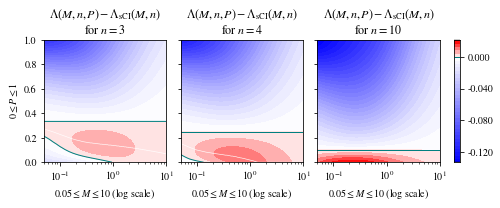

In [33]:
%matplotlib inline  

min_min, max_max = np.min(differences), np.max(differences)
f_levels = np.linspace(min_min, max_max+0.0005, 37, endpoint=True)
                        # PATCH : ici le +0.0005 sert à caller le 0 !

orig_cmap = matplotlib.cm.bwr #seismic
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=-min_min/(max_max-min_min), name='shifted')

figure10 = plt.figure(figsize=(7.5,2.5))
figure10.subplots_adjust(bottom=0.2)
grid = AxesGrid(figure10, 111,
                nrows_ncols=(1, 3),
                axes_pad=0.2,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for ax,data,ni in zip(grid, differences, n):
    p=ax.contourf(X2M, X2P, data, levels=f_levels, cmap=shifted_cmap, vmin=min_min, vmax=max_max)
    ax.set_title(r'$\Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$' + '\n' + r'for $n=$'+str(ni))
    ax.set_xlabel(str(xMmin)+'$\leq M\leq$'+str(xMmax)+' (log scale)')
    ax.set_xscale('log')
    ax.set_xlim(xMmin,xMmax)
    ax.set_ylim(xPmin,xPmax)
    ax.set_aspect((X2M.max()-X2M.min())/(X2P.max()-X2P.min()))
    # --- tracé de l'argmax de la différence
    ax.plot(xM, xP[np.argmax(data,axis=0)], color_du_max, linewidth=.6)
    # --- rajout d'un trait pour le niveau 0 dans la colorbar
    cont = ax.contour(p, levels=[0], colors=color_du_0, linewidths=1)
    
# --- rajout d'un trait pour le niveau 0 dans la colorbar
grid[0].set_ylabel(str(xPmin)+'$\leq P\leq$'+str(xPmax))
cbar = grid.cbar_axes[0].colorbar(p, format='%.3f')

# --- rajout d'un trait pour le niveau 0 dans la colorbar
cbar.add_lines(cont)

pdf = PdfPages('lambda_MnP_diff_ni.pdf')
pdf.savefig(figure10,bbox_inches='tight')
pdf.close()

----------------------
<a name="11"></a>
# 11. Courbe $P \to \Lambda(M,n,P)$ et   $\Lambda_{\mathrm{sCI}}(M,n)$ pour $M=1$ et pour 4 valeurs de  $n=2,3,4,5$ fixées 

In [34]:
n = [2,3,4,5]
M = 1
xPmin, xPmax = 0, 1               # min & max en P
nd = 1000                         # nombre de points de discrétisation 
rP =  xPmax-xPmin                 # ranges
dP = rP/nd                        # pas de discrétisation
xP = np.arange(xPmin, xPmax, dP)  # points de discrétisation

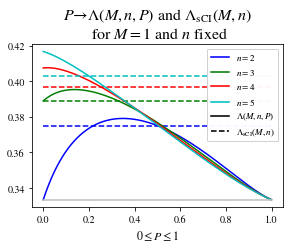

In [35]:
figure_Mn_fixed = plt.figure(figsize=[4.5,3])

p1a, = plt.plot(xP,lambda_ci(M,n[0],xP),'b')
p1b, = plt.plot([0,1],[lambda_sci(M,n[0]),lambda_sci(M,n[0])],'b--')
p2a, = plt.plot(xP,lambda_ci(M,n[1],xP),'g')
p2b, = plt.plot([0,1],[lambda_sci(M,n[1]),lambda_sci(M,n[1])],'g--')
p3a, = plt.plot(xP,lambda_ci(M,n[2],xP),'r')
p3b, = plt.plot([0,1],[lambda_sci(M,n[2]),lambda_sci(M,n[2])],'r--')
p4a, = plt.plot(xP,lambda_ci(M,n[3],xP),'c')
p4b, = plt.plot([0,1],[lambda_sci(M,n[3]),lambda_sci(M,n[3])],'c--')
plt.plot([0,1],[1/3,1/3],color= '0.75')

plt.title(r'$P \to \Lambda(M,n,P)$ and $\Lambda_{\mathrm{sCI}}(M,n)$' \
          + '\n' + r' for $M=1$ and $n$ fixed', fontsize=16)
lambda1Artist = plt.Line2D((0,1),(0,0), color='k')
lambda2Artist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')

plt.xlabel(str(xPmin)+'$\leq P\leq$'+str(xPmax), fontsize=12)
legend_n = plt.legend( [p1a, p2a, p3a, p4a]+[lambda1Artist,lambda2Artist], \
                     ['$n=$'+str(n[0]), '$n=$'+str(n[1]), '$n=$'+str(n[2]), \
                      '$n=$'+str(n[3])]+[r'$\Lambda(M,n,P)$', r'$\Lambda_{\mathrm{sCI}}(M,n)$'], \
                     loc=1, fontsize=9)
plt.gca().add_artist(legend_n)

pdf = PdfPages('lambda_Mn_fixed.pdf')
pdf.savefig(figure_Mn_fixed,bbox_inches='tight')
pdf.close()

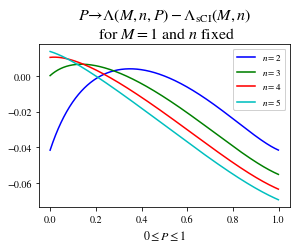

In [36]:
figure_Mn_diff_fixed = plt.figure(figsize=[4.5,3])

p1, = plt.plot(xP,lambda_ci(M,n[0],xP)-lambda_sci(M,n[0]),'b')
p2, = plt.plot(xP,lambda_ci(M,n[1],xP)-lambda_sci(M,n[1]),'g')
p3, = plt.plot(xP,lambda_ci(M,n[2],xP)-lambda_sci(M,n[2]),'r')
p4, = plt.plot(xP,lambda_ci(M,n[3],xP)-lambda_sci(M,n[3]),'c')

plt.title(r'$P \to \Lambda(M,n,P)-\Lambda_{\mathrm{sCI}}(M,n)$' \
          + '\n' + r' for $M=1$ and $n$ fixed', fontsize=16)

plt.xlabel(str(xPmin)+'$\leq P\leq$'+str(xPmax), fontsize=12)
legend_n = plt.legend( [p1, p2, p3, p4], \
                     ['$n=$'+str(n[0]), '$n=$'+str(n[1]), '$n=$'+str(n[2]), '$n=$'+str(n[3])], \
                     loc=1, fontsize=9)
plt.gca().add_artist(legend_n)

pdf = PdfPages('lambda_Mn_diff_fixed.pdf')
pdf.savefig(figure_Mn_diff_fixed,bbox_inches='tight')
pdf.close()

----------------
<a name="12"></a>
# 12. Tracés de $n\to \Lambda^*(M,n)$ et $n\to P^*(M,n)$  pour $M=0.1,1,10$

### 12.1 Tracé de $n\to \Lambda^*(M,n)$  pour $M=0.1,1,10$

#### 12.1.1 Paramètres

In [37]:
xPmin, xPmax = 0, 1
xnmin, xnmax = 2, 30
nd = 2000 # attention on est en log, donc plus de points !
dn, dP = (xnmax-xnmin)/nd, (xPmax-xPmin)/nd
xn, xP = np.arange(xnmin, xnmax, dn), np.arange(xPmin, xPmax, dP)
X4n,  X4P  = np.meshgrid(xn, xP) 
M = [0.1, 1, 10]

#### 12.1.2 Tracé de $n\to \Lambda^*(M,n)$ pour $M=0.1,1,10$


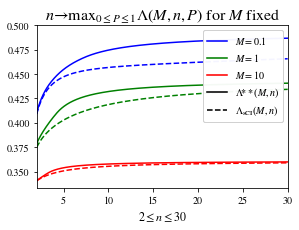

In [38]:
%matplotlib inline  

figure12a = plt.figure(figsize=[4.5,3])

le_lambda = lambda_ci(M[0], X4n, X4P)
lambda_star_star = le_lambda.max(axis=0)
p1a, = plt.plot(xn,lambda_star_star,'b')
p1b, = plt.plot(xn,lambda_sci(M[0],xn),'b--')

le_lambda = lambda_ci(M[1], X4n, X4P)
lambda_star_star = le_lambda.max(axis=0)
p2a, = plt.plot(xn,lambda_star_star,'g')
p2b, = plt.plot(xn,lambda_sci(M[1],xn),'g--')

le_lambda = lambda_ci(M[2], X4n, X4P)
lambda_star_star = le_lambda.max(axis=0)
p3a, = plt.plot(xn,lambda_star_star,'r')
p3b, = plt.plot(xn,lambda_sci(M[2],xn),'r--')

zoom = [xnmin, xnmax, 1/3, 0.5]
plt.axis(zoom)

plt.title(r'$n\to $max$_{0\leq P\leq 1}\Lambda(M,n,P)$ for $M$ fixed', fontsize=16)
ttl = plt.gca().title
#ttl.set_position([.5, 1.05]) # extra space

plt.xlabel(str(zoom[0])+'$\leq n\leq$'+str(zoom[1]), fontsize=12)

# --- travail sur la légende
lambda1Artist = plt.Line2D((0,1),(0,0), color='k')
lambda2Artist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')
legend_n = plt.legend( [p1a, p2a, p3a]+[lambda1Artist,lambda2Artist], \
                     ['$M=$'+str(M[0]), '$M=$'+str(M[1]), \
                      '$M=$'+str(M[2])]+[r'$\Lambda\!{**}(M,n)$', r'$\Lambda_{\mathrm{sCI}}(M,n)$'], \
                     loc=1)
plt.gca().add_artist(legend_n)

pdf = PdfPages('lambda_star_star_n.pdf')
pdf.savefig(figure12a,bbox_inches='tight')
pdf.close()

### 12.1 Discret - Tracé de $n\to \Lambda^*(M,n)$  pour $M=0.1,1,10$

#### 12.1.1 Discret - Paramètres

In [39]:
xPmin, xPmax = 0, 1
xnmin, xnmax = 2, 30
nd = 2000 # attention on est en log, donc plus de points !
dP = (xPmax-xPmin)/nd
xn, xP = np.arange(xnmin, xnmax+1, 1), np.arange(xPmin, xPmax, dP)
X4n,  X4P  = np.meshgrid(xn, xP) 
M = [0.1, 1, 10]

In [40]:
#### 12.1.2 Discret - Tracé de $n\to \Lambda^*(M,n)$ pour $M=0.1,1,10$

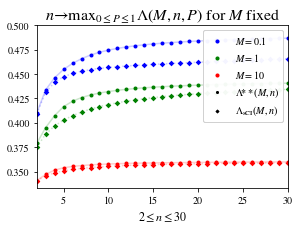

In [41]:
%matplotlib inline  

figure12a = plt.figure(figsize=[4.5,3])

le_lambda = lambda_ci(M[0], X4n, X4P)
lambda_star_star = le_lambda.max(axis=0)
plt.plot(xn,lambda_star_star,'b',alpha=0.2)
p1a, = plt.plot(xn,lambda_star_star,'bo',markersize=4,markeredgecolor='none')
plt.plot(xn,lambda_sci(M[0],xn),'b:',alpha=0.2)
plt.plot(xn,lambda_sci(M[0],xn),'bD',markersize=4,markeredgecolor='none')


le_lambda = lambda_ci(M[1], X4n, X4P)
lambda_star_star = le_lambda.max(axis=0)
plt.plot(xn,lambda_star_star,'g',alpha=0.2)
p2a, = plt.plot(xn,lambda_star_star,'go',markersize=4,markeredgecolor='none')
plt.plot(xn,lambda_sci(M[1],xn),'g:',alpha=0.2)
plt.plot(xn,lambda_sci(M[1],xn),'gD',markersize=4,markeredgecolor='none')

le_lambda = lambda_ci(M[2], X4n, X4P)
lambda_star_star = le_lambda.max(axis=0)
plt.plot(xn,lambda_star_star,'r',alpha=0.2)
p3a, = plt.plot(xn,lambda_star_star,'ro',markersize=4,markeredgecolor='none')
plt.plot(xn,lambda_sci(M[2],xn),'r:',alpha=0.2)
plt.plot(xn,lambda_sci(M[2],xn),'rD',markersize=4,markeredgecolor='none')


zoom = [xnmin, xnmax, 1/3, 0.5]
plt.axis(zoom)

plt.title(r'$n\to $max$_{0\leq P\leq 1}\Lambda(M,n,P)$ for $M$ fixed', fontsize=16)
ttl = plt.gca().title
#ttl.set_position([.5, 1.05]) # extra space

plt.xlabel(str(zoom[0])+'$\leq n\leq$'+str(zoom[1]), fontsize=12)

# --- travail sur la légende
lambda1Artist = plt.scatter(0, 0, s=4, c='k', marker='o')
lambda2Artist = plt.scatter(0, 0, s=4, c='k', marker='D')
legend_n = plt.legend( [p1a, p2a, p3a]+[lambda1Artist,lambda2Artist], \
                     ['$M=$'+str(M[0]), '$M=$'+str(M[1]), \
                      '$M=$'+str(M[2])]+[r'$\Lambda\!{**}(M,n)$', r'$\Lambda_{\mathrm{sCI}}(M,n)$'], \
                     loc=1,numpoints=1)
plt.gca().add_artist(legend_n)

pdf = PdfPages('lambda_star_star_n_dis.pdf')
pdf.savefig(figure12a,bbox_inches='tight')
pdf.close()

### 12.1b Tracé de $M\to P^*(M,n)$  pour $n=3,4,10$

#### 12.1b.1 Paramètres

In [42]:
xPmin, xPmax = 0, 1
xMmin, xMmax = 0.05, 10
nd = 2000 # attention on est en log, donc plus de points !
dM, dP = (xMmax-xMmin)/nd, (xPmax-xPmin)/nd
xM, xP = np.arange(xMmin, xMmax, dM), np.arange(xPmin, xPmax, dP)
X4bM,  X4bP  = np.meshgrid(xM, xP) 
n = [3, 4, 10]

#### 12.1b.2 Tracé de $M\to \Lambda^*(M,n)$ pour $n=3,4,10$


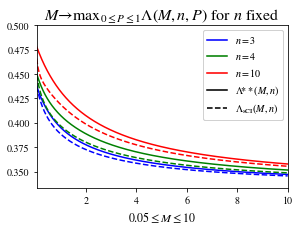

In [43]:
%matplotlib inline  

figure12ab = plt.figure(figsize=[4.5,3])

le_lambda = lambda_ci(X4bM, n[0], X4bP)
lambda_star_star = le_lambda.max(axis=0)
p1a, = plt.plot(xM,lambda_star_star,'b')
p1b, = plt.plot(xM,lambda_sci(xM,n[0]),'b--')

le_lambda = lambda_ci(X4bM, n[1], X4bP)
lambda_star_star = le_lambda.max(axis=0)
p2a, = plt.plot(xM,lambda_star_star,'g')
p2b, = plt.plot(xM,lambda_sci(xM,n[1]),'g--')

le_lambda = lambda_ci(X4bM, n[2], X4bP)
lambda_star_star = le_lambda.max(axis=0)
p3a, = plt.plot(xM,lambda_star_star,'r')
p3b, = plt.plot(xM,lambda_sci(xM,n[2]),'r--')

zoom = [xMmin, xMmax, 1/3, 0.5]
plt.axis(zoom)

plt.title(r'$M\to $max$_{0\leq P\leq 1}\Lambda(M,n,P)$ for $n$ fixed', fontsize=16)
ttl = plt.gca().title
#ttl.set_position([.5, 1.05]) # extra space

plt.xlabel(str(zoom[0])+'$\leq M\leq$'+str(zoom[1]), fontsize=12)

# --- travail sur la légende
lambda1Artist = plt.Line2D((0,1),(0,0), color='k')
lambda2Artist = plt.Line2D((0,1),(0,0), color='k', linestyle='--')
legend_n = plt.legend( [p1a, p2a, p3a]+[lambda1Artist,lambda2Artist], \
                     ['$n=$'+str(n[0]), '$n=$'+str(n[1]), \
                      '$n=$'+str(n[2])]+[r'$\Lambda\!{**}(M,n)$', r'$\Lambda_{\mathrm{sCI}}(M,n)$'], \
                     loc=1)
plt.gca().add_artist(legend_n)

pdf = PdfPages('lambda_star_star_M.pdf')
pdf.savefig(figure12ab,bbox_inches='tight')
pdf.close()

### 12.2 Tracé de $n\to P^*(M,n)$  pour $M=0.1,1,10$

#### 12.2.1 Paramètres

<font color="red">PASSER EN ENTIERS: faire que les valeurs entières de $n$ reliés par des droites</font>

In [44]:
xPmin, xPmax = 0, 1
xnmin, xnmax = 2, 10
nd = 2000 # attention on est en log, donc plus de points !
dn, dP = (xnmax-xnmin)/nd, (xPmax-xPmin)/nd
xn, xP = np.arange(xnmin, xnmax, dn), np.arange(xPmin, xPmax, dn)
X4n, X4P  = np.meshgrid(xn, xP) 
M = [0.1, 1, 10]

#### 12.2.2 Tracé

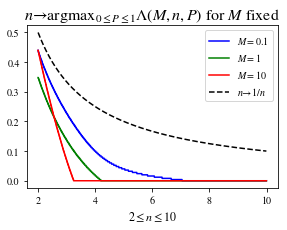

In [45]:
%matplotlib inline  

figure12b = plt.figure(figsize=[4.5,3])

le_lambda = lambda_ci(M[0], X4n, X4P)
p1, = plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'b')
le_lambda = lambda_ci(M[1], X4n, X4P)
p2, = plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'g')
le_lambda = lambda_ci(M[2], X4n, X4P)
p3, = plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'r')
p4, = plt.plot(xn,1/xn,'k',linestyle='--')

plt.title(r'$ n\to  $argmax$_{0\leq P\leq 1}\Lambda(M,n,P)$ for $M$ fixed', fontsize=16)

#ttl = plt.gca().title
#ttl.set_position([.5, 1.05]) # extra space

plt.xlabel(str(xnmin)+'$\leq n\leq$'+str(xnmax), fontsize=12)
plt.legend([p1,p2,p3,p4],['$M=$'+str(M[0]), '$M=$'+str(M[1]), '$M=$'+str(M[2]), r'$n \to 1/n$'],loc=1)
                          
pdf = PdfPages('P_star_n.pdf')
pdf.savefig(figure12b,bbox_inches='tight')
pdf.close()

### 12.2 bis Tracé de $n\to P^*(M,n)$  pour $M=0.1,1,10$ en entier

#### 12.2.1 bis Paramètres

<font color="red">PASSER EN ENTIERS: faire que les valeurs entières de $n$ reliés par des droites</font>

In [46]:
xPmin, xPmax = 0, 1
xnmin, xnmax = 2, 10
nd = 2000 # attention on est en log, donc plus de points !
dP = (xPmax-xPmin)/nd
xn, xP = np.arange(xnmin, xnmax+1, 1), np.arange(xPmin, xPmax, dn)
X4n, X4P  = np.meshgrid(xn, xP) 
M = [0.1, 1, 10]

#### 12.2.2 Tracé

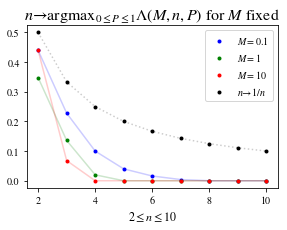

In [47]:
%matplotlib inline  

figure12b = plt.figure(figsize=[4.5,3])

le_lambda = lambda_ci(M[0], X4n, X4P)
plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'b-',alpha=0.2)
p1, = plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'bo',markersize=4,markeredgecolor='none')
le_lambda = lambda_ci(M[1], X4n, X4P)
plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'g-',alpha=0.2)
p2, = plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'go',markersize=4,markeredgecolor='none')
le_lambda = lambda_ci(M[2], X4n, X4P)
plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'r-',alpha=0.2)
p3, = plt.plot(xn,xP[np.argmax(le_lambda,axis=0)],'ro',markersize=4,markeredgecolor='none')
plt.plot(xn,1/xn,'k:',alpha=0.2)
p4, = plt.plot(xn,1/xn,'ko',markersize=4,markeredgecolor='none')


plt.title(r'$ n\to  $argmax$_{0\leq P\leq 1}\Lambda(M,n,P)$ for $M$ fixed', fontsize=16)

plt.xlabel(str(xnmin)+'$\leq n\leq$'+str(xnmax), fontsize=12)
plt.legend([p1,p2,p3,p4],['$M=$'+str(M[0]), '$M=$'+str(M[1]), '$M=$'+str(M[2]), r'$n \to 1/n$'],loc=1,numpoints=1)
                          
pdf = PdfPages('P_star_n_dis.pdf')
pdf.savefig(figure12b,bbox_inches='tight')
pdf.close()